In [12]:
import sys; sys.path.insert(0, '..')

import gym
import sys
import torch
import tester
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output, Javascript

import pytorch_drl.models.actor_critic_models as models
from notebook_utils import plot, mean_filter
from pytorch_drl.algs.acktr import ACKTR

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda:0


## Create environment

In [15]:
env_name = "LunarLander-v2"
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

State size: 4 
Action size: 2


/home/selo/Envs/ml-agent_/gym/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


## ACKTR Test

State size: 4 
Action size: 2
Avg score: 196.31 i: 902                       Solved! Episode 902


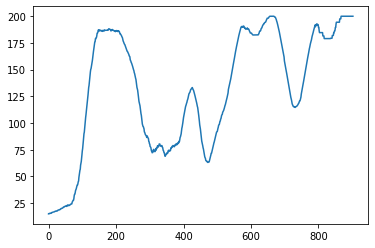

In [16]:
env_name = "CartPole-v0"
env = gym.make(env_name)
env.seed(0)

state_size =  env.observation_space.shape[0]
action_size = env.action_space.n

print("State size:", state_size, "\nAction size:", action_size)

tmax = 5
n_episodes = (20_000)//tmax
n_env = 16

model = models.ActorCriticMLP(state_size, action_size, env.action_space)

# init agent:
agent = ACKTR(actor_critic=model,
                env_id=env_name,
                n_env=n_env,
                )

max_score = 195.
model_name = "acktr_{}".format(env_name)
# train the agent
scores, losses = agent.train(tmax, n_episodes,  env, max_score, model_name)

# plot the training:
x = np.arange(len(scores))
scores = mean_filter(scores, 50)
plt.plot(x, scores, label = "scores")
plt.show()

### Trained Agent Demonstration

In [ ]:
tester.test_agent(agent, env, max_t=200, render=True, num_of_episodes=5, log=True)